In [15]:
%reset
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
from pdf_computer import pdfComputer

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# The number of bins in each dimension
nx, ny, nz = 20, 25, 30

# Settings for plot
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18

# 1D testing
data1D = np.random.normal(0, 1, (100, 1))

pdfsolver12 = pdfComputer(ndim=1, approach='fixedBin')
pdfsolver1111 = pdfComputer(ndim=1, approach='kde', bandwidth='silverman', kernel='gaussian')
pdfsolver1112 = pdfComputer(ndim=1, approach='kde', bandwidth='crossvalidation', kernel='gaussian')
pdfsolver1121 = pdfComputer(ndim=1, approach='kde', bandwidth='silverman', kernel='epanechnikov')
pdfsolver1122 = pdfComputer(ndim=1, approach='kde', bandwidth='crossvalidation', kernel='epanechnikov')

t1111, pdf1111, cd1111 = pdfsolver1111.computePDF(data1D, nbins=[nx])
t1112, pdf1112, cd1112 = pdfsolver1112.computePDF(data1D, nbins=[nx])
t1121, pdf1121, cd1121 = pdfsolver1121.computePDF(data1D, nbins=[nx])
t1122, pdf1122, cd1122 = pdfsolver1122.computePDF(data1D, nbins=[nx])
t12, pdf12, cd12 = pdfsolver12.computePDF(data1D, nbins=[nx])

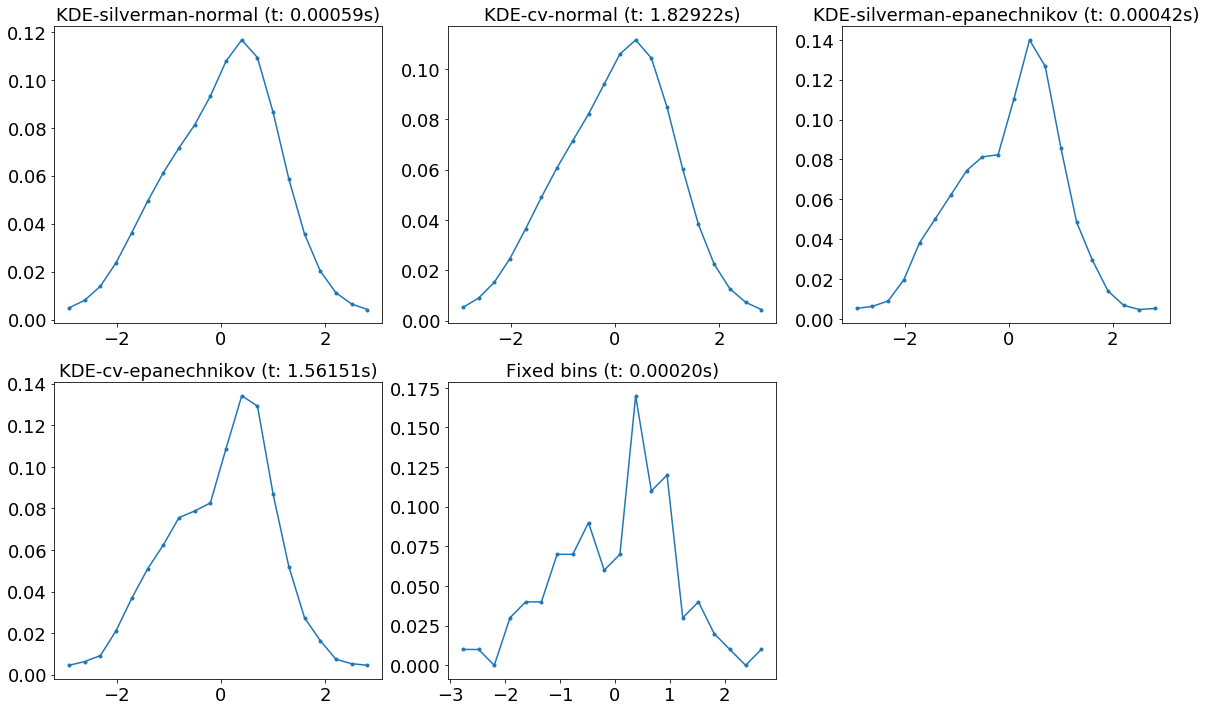

In [17]:
# plot for 1D testing
# plt.figure()
plt.subplot(2, 3, 1)
plt.plot(cd1111, pdf1111, '.-')
plt.title('KDE-silverman-normal (t: %.5fs)' % t1111)

plt.subplot(2, 3, 2)
plt.plot(cd1112, pdf1112, '.-')
plt.title('KDE-cv-normal (t: %.5fs)' % t1112)

plt.subplot(2, 3, 3)
plt.plot(cd1121, pdf1121, '.-')
plt.title('KDE-silverman-epanechnikov (t: %.5fs)' % t1121)

plt.subplot(2, 3, 4)
plt.plot(cd1122, pdf1122, '.-')
plt.title('KDE-cv-epanechnikov (t: %.5fs)' % t1122)

plt.subplot(2, 3, 5)
plt.plot(cd12, pdf12, '.-')
plt.title('Fixed bins (t: %.5fs)' % t12)

plt.show()

In [22]:
# 2D testing
# An example of how to test 2D: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
mean = [0, 0]
cov  = [[1, .3], [.3, 1]]
data2D = np.random.multivariate_normal(mean, cov, 1000)

pdfsolver22 = pdfComputer(ndim=2, approach='fixedBin')
pdfsolver2111 = pdfComputer(ndim=2, approach='kde', bandwidth='silverman', kernel='gaussian')
pdfsolver2112 = pdfComputer(ndim=2, approach='kde', bandwidth='crossvalidation', kernel='gaussian')
pdfsolver2121 = pdfComputer(ndim=2, approach='kde', bandwidth='silverman', kernel='epanechnikov')
pdfsolver2122 = pdfComputer(ndim=2, approach='kde', bandwidth='crossvalidation', kernel='epanechnikov')

t2111, pdf2111, cd2111 = pdfsolver2111.computePDF(data2D, nbins=[nx,ny])
t2112, pdf2112, cd2112 = pdfsolver2112.computePDF(data2D, nbins=[nx,ny])
t2121, pdf2121, cd2121 = pdfsolver2121.computePDF(data2D, nbins=[nx,ny])
t2122, pdf2122, cd2122 = pdfsolver2122.computePDF(data2D, nbins=[nx,ny])
t22, pdf22, cd22 = pdfsolver22.computePDF(data2D, nbins=[nx,ny])

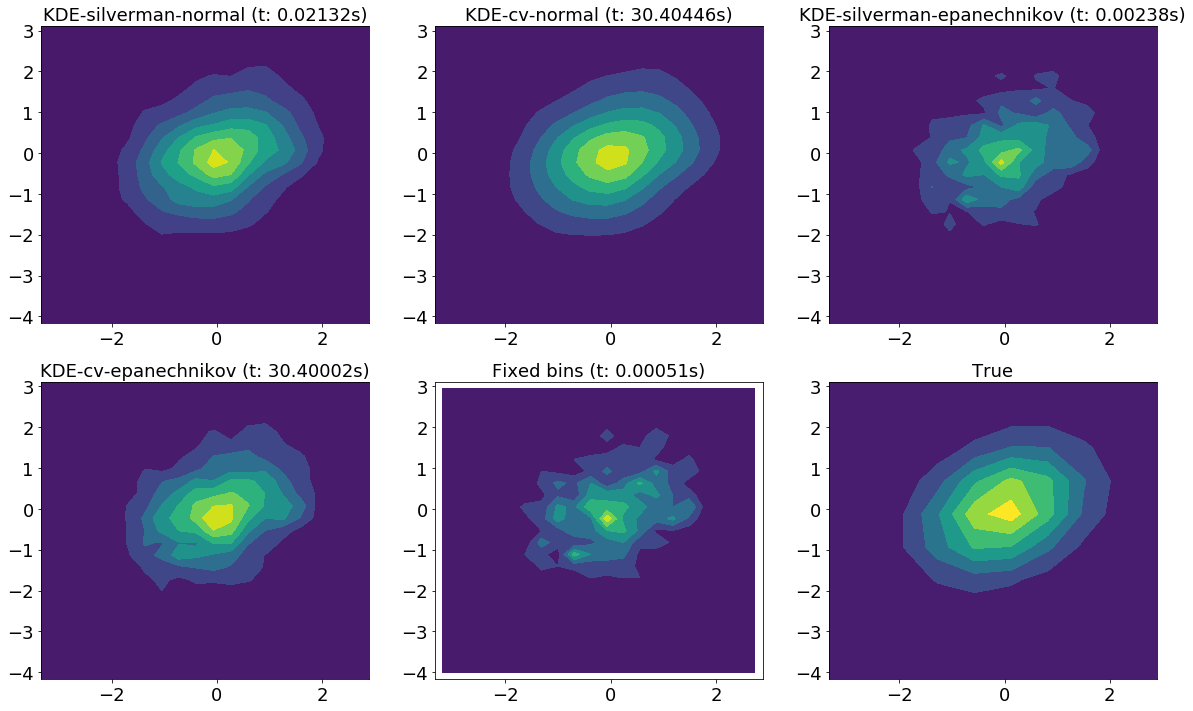

In [23]:
# plot for 2D testing
xarray, yarray = data2D[:, 0], data2D[:, 1]
xlim, ylim = [xarray.min(), xarray.max()], [yarray.min(), yarray.max()]
xvt, yvt = np.meshgrid(np.linspace(xlim[0], xlim[1], 10), 
                     np.linspace(ylim[0], ylim[1], 10), indexing='ij')
pos = np.empty(xvt.shape + (2,))
pos[:, :, 0] = xvt
pos[:, :, 1] = yvt
truepdf = multivariate_normal(mean, cov)
truepdfv = truepdf.pdf(pos)
allpdfv = np.concatenate((truepdfv.flatten(), pdf2111.flatten(), 
                          pdf2112.flatten(), pdf2121.flatten(), 
                          pdf2122.flatten(), pdf22.flatten()))
vmax, vmin = allpdfv.max(), allpdfv.min()

# plt.figure()
plt.subplot(2, 3, 1)
xv, yv = np.meshgrid(cd2111[0], cd2111[1], indexing='ij')
plt.contourf(xv, yv, pdf2111, xlim=xlim, ylim=ylim)
#              norm=plt.Normalize(vmax=vmax, vmin=vmin))
plt.title('KDE-silverman-normal (t: %.5fs)' % t2111)

plt.subplot(2, 3, 2)
xv, yv = np.meshgrid(cd2112[0], cd2112[1], indexing='ij')
plt.contourf(xv, yv, pdf2112, xlim=xlim, ylim=ylim)
#              norm=plt.Normalize(vmax=vmax, vmin=vmin))
plt.title('KDE-cv-normal (t: %.5fs)' % t2112)

plt.subplot(2, 3, 3)
xv, yv = np.meshgrid(cd2121[0], cd2121[1], indexing='ij')
plt.contourf(xv, yv, pdf2121, xlim=xlim, ylim=ylim)
#                norm=plt.Normalize(vmax=vmax, vmin=vmin))
plt.title('KDE-silverman-epanechnikov (t: %.5fs)' % t2121)

plt.subplot(2, 3, 4)
xv, yv = np.meshgrid(cd2122[0], cd2122[1], indexing='ij')
plt.contourf(xv, yv, pdf2122, xlim=xlim, ylim=ylim)
#                norm=plt.Normalize(vmax=vmax, vmin=vmin))
plt.title('KDE-cv-epanechnikov (t: %.5fs)' % t2122)

plt.subplot(2, 3, 5)
xv, yv = np.meshgrid(cd22[0], cd22[1], indexing='ij')
plt.contourf(xv, yv, pdf22, xlim=xlim, ylim=ylim)
#                norm=plt.Normalize(vmax=vmax, vmin=vmin))
plt.xlim(xlim)
plt.ylim(ylim)
plt.title('Fixed bins (t: %.5fs)' % t22)

plt.subplot(2, 3, 6)
plt.contourf(xvt, yvt, truepdfv, xlim=xlim, ylim=ylim,
             norm=plt.Normalize(vmax=vmax, vmin=vmin))
plt.title('True')

plt.show()

In [20]:
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(xarray, yarray, pdf2111, rstride=8, cstride=8, alpha=0.3)
# ax.tricontourf(xarray, yarray, pdf2111, zdir= 'z', cmap=cm.coolwarm)
# plt.show()

In [21]:
# 3D testing
# mean = [0, 0, 0]
# cov  = [[1., .3, 0.4], [.3, 1., .2], [.4, .2, 1.]]
# data3D = np.random.multivariate_normal(mean, cov, 100)

# pdfsolver32 = pdfComputer(ndim=3, approach='fixedBin', bins=10)
# pdfsolver3111 = pdfComputer(ndim=3, approach='kde', bandwidth='silverman', kernel='gaussian')
# pdfsolver3112 = pdfComputer(ndim=3, approach='kde', bandwidth='crossvalidation', kernel='gaussian')
# pdfsolver3121 = pdfComputer(ndim=3, approach='kde', bandwidth='silverman', kernel='epanechnikov')
# pdfsolver3122 = pdfComputer(ndim=3, approach='kde', bandwidth='crossvalidation', kernel='epanechnikov')

# t3111, pdf3111 = pdfsolver3111.computePDF(data3D, nbins=[nx,ny,nz])
# t3112, pdf3112 = pdfsolver3112.computePDF(data3D, nbins=[nx,ny,nz])
# t3121, pdf3121 = pdfsolver3121.computePDF(data3D, nbins=[nx,ny,nz])
# t3122, pdf3122 = pdfsolver3122.computePDF(data3D, nbins=[nx,ny,nz])
# t32, pdf32, edges = pdfsolver32.computePDF(data3D, nbins=[nx,ny,nz])